<a href="https://colab.research.google.com/github/arjunsumina/analytics_code/blob/main/convolution_neural_networks_code_2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nltk is the natural language tool kit

In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 6.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

keras provides the python interface for tensorflow
sequential - neural network layers
dense - density of neural networks
flatten - flatten the output from a 2d to 1 d
MaxPooling - Downscaling
---



In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
movie_review_df = pd.read_csv(r'https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2011%20-%20Sentiment%20Analysis%20-%20Unsupervised%20Learning/movie_reviews.csv.bz2', compression='bz2')


In [ ]:
type(movie_review_df)

pandas.core.frame.DataFrame

In [ ]:
movie_review_df.shape

(50000, 2)

In [ ]:
movie_review_df.to_csv('movie_review_df.csv') 
from google.colab import files
# In case you want to download the file, please download it.
#files.download("movie_review_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(movie_review_df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
movie_review_df.columns

Index(['review', 'sentiment'], dtype='object')

training set consists of 35000 points and testing set consists of 15000 points

In [ ]:
# training and testing data set creation
movie_review = movie_review_df['review'].values
movie_sentiment = movie_review_df['sentiment'].values

movie_review_training = movie_review[:35000]
movie_review_testing = movie_review[35000:]

movie_sentiment_training = movie_sentiment[:35000]
movie_sentiment_testing = movie_sentiment[35000:]


text wrangling - 
sentence splitting, tokenization, stemming, lemmatization, and stop word removal.

In [ ]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata


def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

In [ ]:
preprocess_train_reviews = pre_process_corpus(movie_review_training)
preprocess_test_reviews = pre_process_corpus(movie_review_testing)

100%|██████████| 15000/15000 [00:07<00:00, 2007.07it/s]


Tokenisation allows to vectorize a text corpus, by turning each text into <br>either a sequence of integers (each integer being the index of a token in <br>a dictionary) or into a vector where the coefficient for each token <br>could be binary, based on word count, based on tf-idf...

In [ ]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(preprocess_train_reviews)
t.word_index['<PAD>'] = 0

In [ ]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['<UNK>']

(('dawgis', 175795), ('<PAD>', 0), 1)

In [ ]:
train_sequences = t.texts_to_sequences(preprocess_train_reviews)
type(train_sequences)


list

The number of columns of training set is

In [ ]:
print(len(train_sequences[0]))


308


In [ ]:
test_sequences = t.texts_to_sequences(preprocess_test_reviews)

In [ ]:
print(len(test_sequences[0]))


105


In [ ]:
type(t)

keras.preprocessing.text.Tokenizer

In [ ]:
print(t)

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=175796
Number of Documents=35000


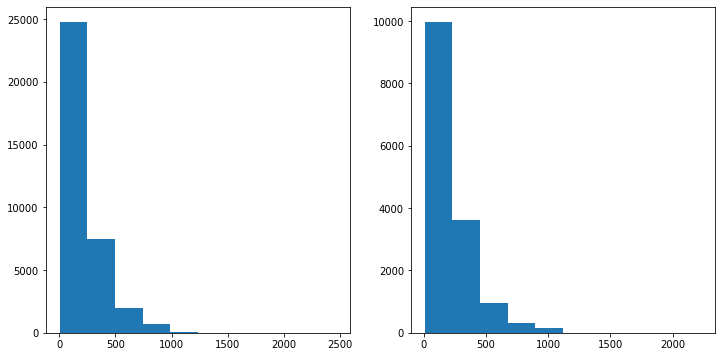

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6),num='plots')

h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)


 pad dataset to a maximum review length in words


In [ ]:
MAX_SEQUENCE_LENGTH = 1000
X_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((35000, 1000), (15000, 1000))

encoding "positive" and "negative" strings to 0 or 1
positive -> 1, negative -> 0

In [ ]:
le = LabelEncoder()
num_classes=2 # 
Y_train = le.fit_transform(movie_sentiment_training)
Y_test = le.transform(movie_sentiment_testing)

In [ ]:
VOCAB_SIZE = len(t.word_index)
print(VOCAB_SIZE)

175796


In [ ]:
print(MAX_SEQUENCE_LENGTH)

1000


Model Preparation
Since textual data is a sequence of words, we utilize 1D convolutions to scan through the sentences. The model first transforms each word into lower dimensional embedding/vector space followed by 1d convolutions and then passing the data through dense layers before the final layer for classification

In [ ]:
EMBED_SIZE = 300
EPOCHS=2
BATCH_SIZE=128
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 300)         52738800  
                                                                 
 conv1d_3 (Conv1D)           (None, 1000, 128)         153728    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 500, 128)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 250, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 250, 32)          

In [ ]:
# Fit the model
model.fit(X_train, Y_train, 
          validation_split=0.1,
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          verbose=1)

Epoch 1/2
247/247 [==============================] - 671s 3s/step - loss: 0.3542 - accuracy: 0.8268 - val_loss: 0.2495 - val_accuracy: 0.8929
Epoch 2/2
247/247 [==============================] - 675s 3s/step - loss: 0.1054 - accuracy: 0.9629 - val_loss: 0.2701 - val_accuracy: 0.8977


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 300)         52738800  
                                                                 
 conv1d_3 (Conv1D)           (None, 1000, 128)         153728    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 500, 128)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 250, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 250, 32)          

Model Evaluation

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

469/469 [==============================] - 70s 150ms/step - loss: 0.2602 - accuracy: 0.9047
Accuracy: 90.47%


In [ ]:

#predictions = model.predict_classes(X_test).ravel()


predictions=model.predict(X_test) 
predictions[:10]

#classes_x=np.argmax(predict_x,axis=1)

469/469 [==============================] - 73s 155ms/step


array([[0.01464011],
       [0.99993974],
       [0.00202654],
       [0.9997031 ],
       [0.99857205],
       [0.00173213],
       [0.9985062 ],
       [0.7546159 ],
       [0.9515327 ],
       [0.977303  ]], dtype=float32)

In [ ]:
predictions = ['positive' if item > .5 else 'negative' for item in predictions]
predictions[:1000]

['negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['negative', 'positive']
print(classification_report(movie_sentiment_testing, predictions))
pd.DataFrame(confusion_matrix(movie_sentiment_testing, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      7490
    positive       0.90      0.91      0.91      7510

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



,negative,positive
negative,6752,738
positive,691,6819


In [ ]:
print(movie_sentiment_testing)

['negative' 'positive' 'negative' ... 'negative' 'negative' 'negative']
